Define Bayesian network 

In [1]:
#1. Define Bayesian network 
from pgmpy.models import BayesianNetwork
admission_model = BayesianNetwork([
    ('major','interest'),('working_hours','interest'),('salary','welfare'),
    ('interest','emplyee_offer'),('welfare','emplyee_offer'),

    ('education_level','interview_performance'),
    ('work_experience','interview_performance'),
    ('age','company_offer'),
    ('interview_performance','company_offer'),

    
    ('company_offer','admission'),('emplyee_offer','admission')
   ])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#右边构建节点
from pgmpy.factors.discrete import TabularCPD

#变量名，变量取值个数，对应概率
#marjor 两个   不相关（0）0.5 相关（1）0.5
cpd_major = TabularCPD(variable='major',variable_card=2,values=[[0.5],[0.5]])

#working_hours 三个  (0)0-5小时 0.2  (1)5-8小时 0.5    (2)每天超过8小时（1）0.3
cpd_working_hours = TabularCPD(variable='working_hours',variable_card=3,values=[[0.2],[0.5],[0.3]])

#  salary：三个  1k-5k  0.2 5k-1w 0.6 1w+ 0.2#
cpd_salary = TabularCPD(variable='salary',variable_card=3,values=[[0.2],[0.6],[0.2]])

#interest, 两个， （0不感兴趣），(1感兴趣）
cpd_interest = TabularCPD(variable='interest',variable_card=2,
                                       values=[[0.8,0.6,0.3,0.8,0.4,0.1],[0.2,0.4,0.7,0.2,0.6,0.9]],
                                       evidence=['major','working_hours'],
                                      evidence_card=[2,3])

#welfare, 两个， （0好），（1不好）
cpd_welfare = TabularCPD(variable='welfare',variable_card=2,
                                        values=[[0.6,0.7,0.5],[0.4,0.3,0.5]],
                                        evidence=['salary'],
                                        evidence_card=[3])

#录取者同意, 两个， （0yes），（1no）
cpd_emplyee_offer = TabularCPD(variable='emplyee_offer',variable_card=2,
                                       values=[[0.9,0.7,0.6,0.2],[0.1,0.3,0.4,0.8]],
                                       evidence=['interest','welfare'],
                                      evidence_card=[2,2])

#左边的
#education
# (3 values:(0) PhD, (1) M, (2)B) 
cpd_education_level = TabularCPD(variable='education_level',variable_card=3,values=[[0.1],[0.4],[0.5]])
# Work Experience (2 values: (1)2 years and more, (0)less than 2 years). 
cpd_work_experience = TabularCPD(variable='work_experience',variable_card=2,values=[[0.5],[0.5]])
#(0)age 小于30岁 0.7   (1)大于30岁0.3 
cpd_age = TabularCPD(variable='age',variable_card=2,values=[[0.7],[0.3]])
#Interview Performance (3 values: Excellent, Good, Bad).
cpd_interview_performance = TabularCPD(variable='interview_performance',variable_card=3,
                                       values=[[0.7,0.5,0.6,0.3,0.5,0.2],[0.2,0.3,0.3,0.4,0.2,0.5],[0.1,0.2,0.1,0.3,0.3,0.3]],
                                       evidence=['education_level','work_experience'],
                                      evidence_card=[3,2])
#Company Offer(2 values: Yes, No)
cpd_company_offer = TabularCPD(variable='company_offer',variable_card=2,
                               values=[[0.7,0.6,0.1,0.9,0.7,0.2],[0.3,0.4,0.9,0.1,0.3,0.8]],
                               evidence=['age','interview_performance'],
                                evidence_card=[2,3])

#0 不录取 1 录取
cpd_admission = TabularCPD(variable='admission',variable_card=2,
                            values=[[0.9,0.1,0.01,0.0],[0.1,0.9,0.99,1.0]],
                           evidence=['company_offer','emplyee_offer'],
                           evidence_card=[2,2])



In [3]:
#添加概率表到贝叶斯网络
admission_model.add_cpds(cpd_education_level,cpd_work_experience,cpd_age,cpd_interview_performance,cpd_company_offer,cpd_admission,cpd_major,cpd_working_hours,cpd_salary,cpd_interest,cpd_welfare,cpd_emplyee_offer)


In [4]:
#检查模型
admission_model.check_model()

True

In [5]:
for c in admission_model.get_cpds():
    print(c)

+--------------------+-----+
| education_level(0) | 0.1 |
+--------------------+-----+
| education_level(1) | 0.4 |
+--------------------+-----+
| education_level(2) | 0.5 |
+--------------------+-----+
+--------------------+-----+
| work_experience(0) | 0.5 |
+--------------------+-----+
| work_experience(1) | 0.5 |
+--------------------+-----+
+--------+-----+
| age(0) | 0.7 |
+--------+-----+
| age(1) | 0.3 |
+--------+-----+
+--------------------------+-----+--------------------+
| education_level          | ... | education_level(2) |
+--------------------------+-----+--------------------+
| work_experience          | ... | work_experience(1) |
+--------------------------+-----+--------------------+
| interview_performance(0) | ... | 0.2                |
+--------------------------+-----+--------------------+
| interview_performance(1) | ... | 0.5                |
+--------------------------+-----+--------------------+
| interview_performance(2) | ... | 0.3                |
+------

Bayesian Network Visualization

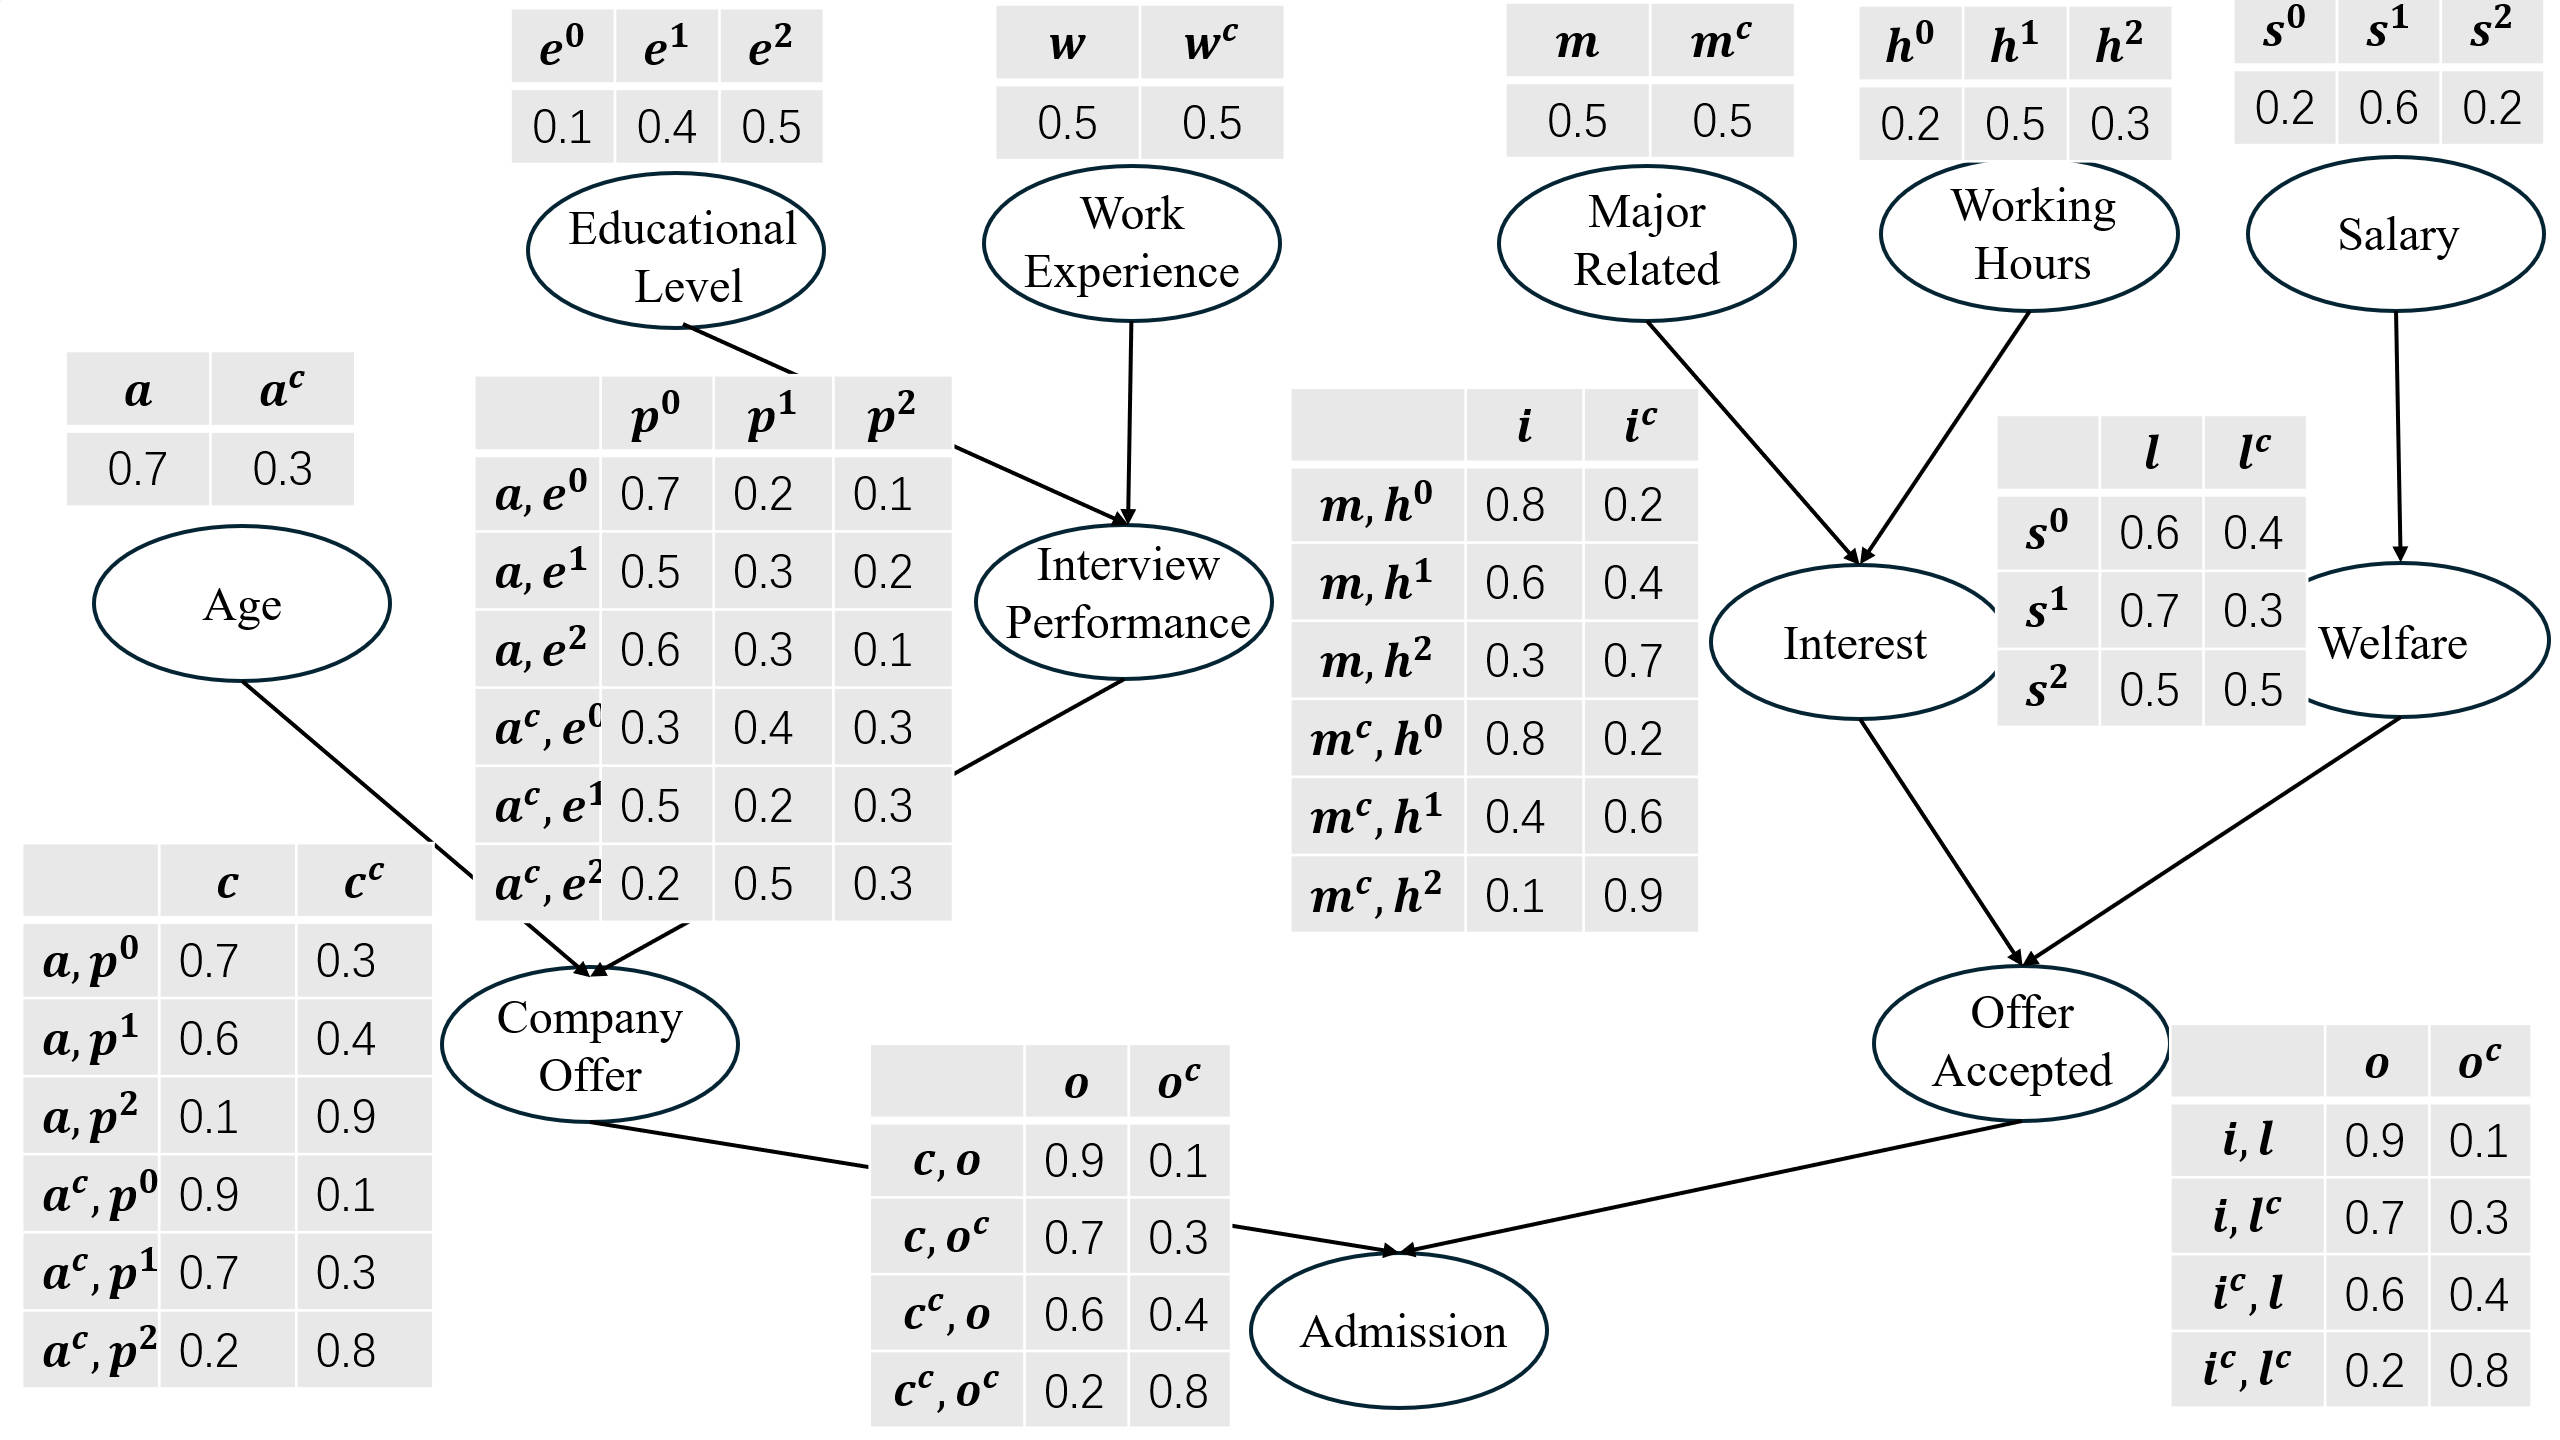

In [6]:
from IPython.display import Image, display

# Local image
display(Image(filename='en_plot.jpg'))


get independence

In [7]:
independencies = admission_model.get_independencies()

print(independencies)

(company_offer ⟂ emplyee_offer, welfare, working_hours, interest, salary, major)
(company_offer ⟂ welfare, working_hours, interest, salary, major | emplyee_offer)
(company_offer ⟂ emplyee_offer, welfare, working_hours, interest, major | salary)
(company_offer ⟂ emplyee_offer, welfare, working_hours, interest, salary | major)
(company_offer ⟂ emplyee_offer, welfare, working_hours, interest, salary, major | education_level)
(company_offer ⟂ emplyee_offer, working_hours, interest, salary, major | welfare)
(company_offer ⟂ emplyee_offer, salary, major, education_level, welfare, work_experience, working_hours, interest | interview_performance)
(company_offer ⟂ emplyee_offer, welfare, interest, salary, major | working_hours)
(company_offer ⟂ emplyee_offer, welfare, working_hours, interest, salary, major | work_experience)
(company_offer ⟂ emplyee_offer, welfare, working_hours, interest, salary, major | age)
(company_offer ⟂ emplyee_offer, welfare, working_hours, salary, major | interest)
(co

Inference
1. Exact inference（Variable Elimination）

    1.1  Variable Elimination（Using the pgmpy Library）
    
    Using the pgmpy Library and use MAP Query to find the most probable 'admission' given evidence

In [8]:
from pgmpy.inference import VariableElimination
ve = VariableElimination(admission_model)
result1= ve.query(variables=['admission'], evidence={'major': 0,'education_level': 0})
print(result1)


# MAP Query to find the most probable 'admission' given evidence
map1 = ve.map_query(variables=['admission'], evidence={'major': 0,'education_level': 0})
print(map1)

+--------------+------------------+
| admission    |   phi(admission) |
+==============+==================+
| admission(0) |           0.4003 |
+--------------+------------------+
| admission(1) |           0.5997 |
+--------------+------------------+


Eliminating: interest: 100%|██████████| 9/9 [00:00<00:00, 4841.44it/s]   

{'admission': 1}


        1.2  Variable Elimination（Using Custom infer() function 

In [9]:
def infer(model, query, evidence):
    '''
    input: 
        model (BayesianNetwork): 贝叶斯网络模型
        query (str/list): 需要查询的目标变量
        evidence (dict): 观测到的变量及其对应的值
        
    output: 
        dict: 查询目标变量的后验概率分布
    '''
    # 将所有CPD转化为因子（factor）
    F = {node: model.get_cpds(node).to_factor() for node in model.nodes()}

    if isinstance(query, list):
        results = {}
        
        # 对每个目标变量进行推理
        for query_var in query:
            # 确定消除顺序：排除目标变量和观测到的变量
            order = [var for var in model.nodes() if var != query_var and var not in evidence]

            # 逐一消除其他变量
            for var in order:
                F = eliminate(F, var)

            # 计算剩余因子的乘积
            final_factor = None
            for factor in F.values():
                if final_factor is None:
                    final_factor = factor
                else:
                    final_factor = final_factor.product(factor, inplace=False)

            # 应用观测值
            if evidence:
                final_factor.reduce([(var, val) for var, val in evidence.items()], inplace=True)

            # 归一化
            final_factor.normalize()

            # 提取目标变量的边际概率分布
            results[query_var] = final_factor.values
        
        # 打印每个查询变量的最大值和对应的标签
        for query_var, values in results.items():
            max_value = max(values)
            max_index = values.argmax()  # 获取最大值的索引
            max_label = max_index  # 假设索引0对应admission=0，索引1对应admission=1
            
            # 打印最大值和对应标签
            print(f"Maximum value for '{query_var}': {max_value}, corresponding to {query_var}={max_label}")
            
    else:
        # 处理单个查询变量
        query_var = query
        # 确定消除顺序：排除目标变量和观测到的变量
        order = [var for var in model.nodes() if var != query_var and var not in evidence]

        # 逐一消除其他变量
        for var in order:
            F = eliminate(F, var)

        # 计算剩余因子的乘积
        final_factor = None
        for factor in F.values():
            if final_factor is None:
                final_factor = factor
            else:
                final_factor = final_factor.product(factor, inplace=False)

        # 应用观测值
        if evidence:
            final_factor.reduce([(var, val) for var, val in evidence.items()], inplace=True)

        # 归一化
        final_factor.normalize()

        # 提取目标变量的边际概率分布
        results = {query_var: final_factor.values}
        
        # 打印最大值和对应标签
        max_value = max(results[query_var])
        max_index = results[query_var].argmax()  # 获取最大值的索引
        max_label = max_index  # 假设索引0对应admission=0，索引1对应admission=1
        print(f"Maximum value for '{query_var}': {max_value}, corresponding to {query_var}={max_label}")
    
    return results



def eliminate(F, z):
    factors = [f for f in F.values() if z in f.scope()]
    factors_not = {var: f for var, f in F.items() if z not in f.scope()}
    
    # Compute the product of factors involving z
    product_factor = None
    for f in factors:
        if product_factor is None:
            product_factor = f
        else:
            product_factor = product_factor.product(f, inplace=False)
    
    # Eliminate variable z
    marginalized_factor = product_factor.marginalize([z], inplace=False)
    
    # Update the list of factors
    factors_not[z] = marginalized_factor
    return factors_not

# 定义观测数据（证据）
observed_data = {
    'major': 0,
    'education_level': 0
}

# 查询目标变量 'admission' 的后验概率
target_variable = 'admission'

# 调用自定义推理函数
result = infer(admission_model, target_variable, observed_data)



Maximum value for 'admission': 0.599747758, corresponding to admission=1


2. Exact inference（Clique Tree algorithm）

Step 1: Construct the Junction Tree and Visualization

JunctionTree with 6 nodes and 5 edges


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/networkx/drawing/nx_pylab.py:315: UserWarning: 

The arrowsize keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default values.
Note that using FancyArrowPatches may be slow for large graphs.

  draw_networkx_edges(G, pos, arrows=arrows, **edge_kwds)


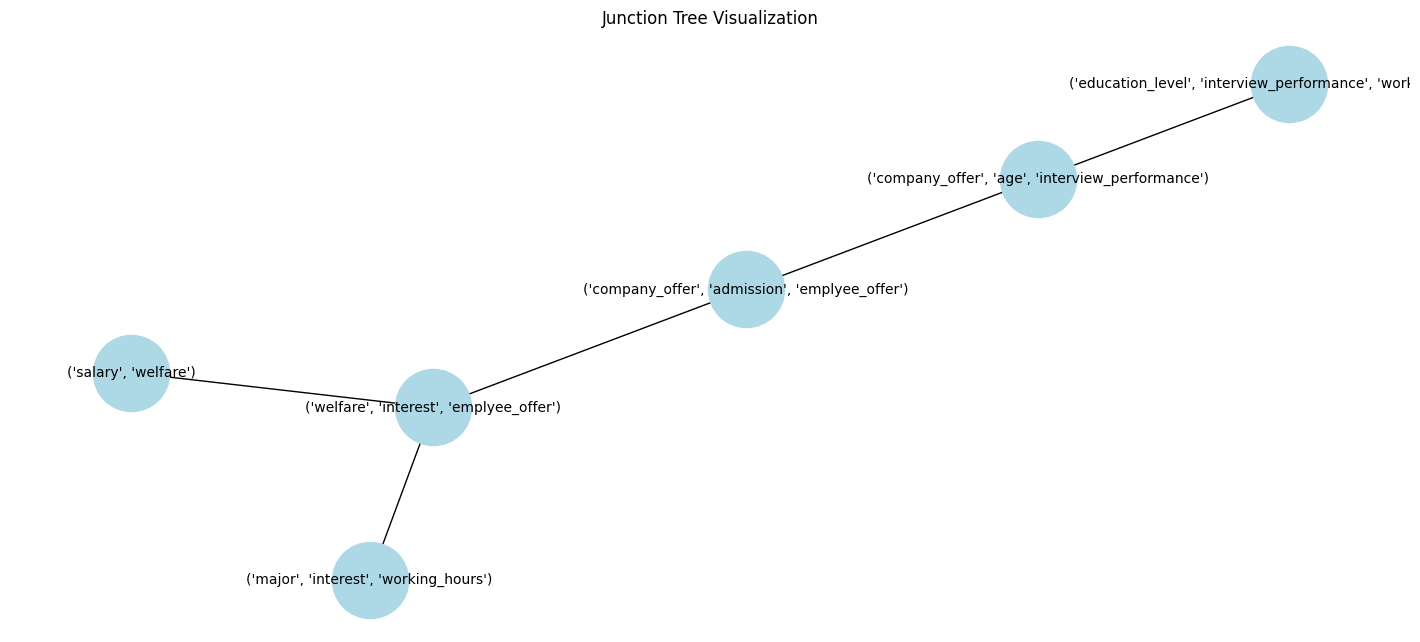

In [10]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# 构建Junction Tree并输出
junction_tree = admission_model.to_junction_tree()
print(junction_tree)

# 创建一个空的networkx图
junction_tree_graph = nx.Graph()

# 添加Junction Tree的节点到图中
for node in junction_tree.nodes():
    junction_tree_graph.add_node(node)

# 添加Junction Tree的边到图中
for edge in junction_tree.edges():
    junction_tree_graph.add_edge(*edge)

# 绘制图形
plt.figure(figsize=(14, 6))
pos = nx.spring_layout(junction_tree_graph)
nx.draw(junction_tree_graph, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, arrowsize=20)
plt.title("Junction Tree Visualization")
plt.show()



Perform message passing through Belief Propagation:

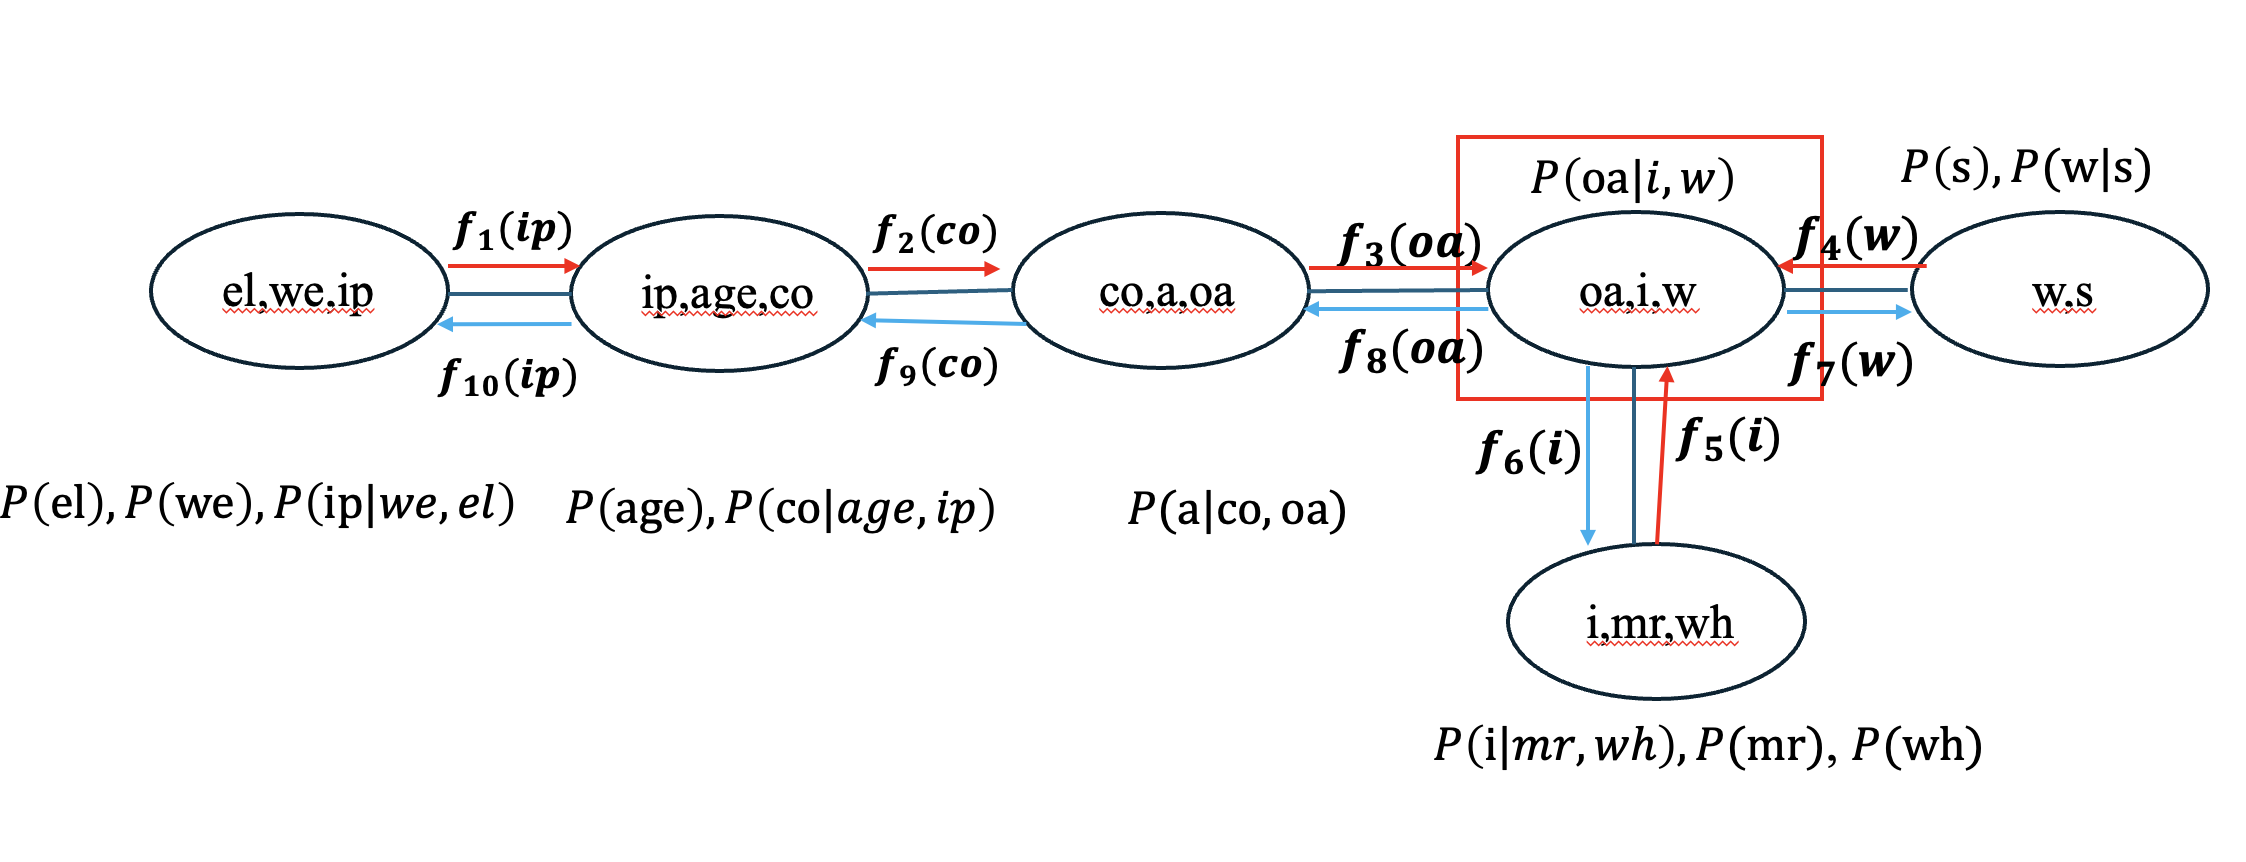

In [11]:
# Local image
display(Image(filename='pass.jpg'))

In [12]:
from pgmpy.inference import BeliefPropagation
# 创建信念传播推断器
bp = BeliefPropagation(junction_tree)
result2= bp.query(variables=['admission'], evidence={'major': 0,'education_level': 0})
print(result2)
# MAP Query to find the most probable 'admission' given evidence
map2 = bp.map_query(variables=['admission'], evidence={'major': 0,'education_level': 0})
print(map2)

# 创建 BeliefPropagation 对象，并传入 Junction Tree 对象
bp = BeliefPropagation(junction_tree)

# 执行消息传递算法
bp.calibrate()

# 获取最终的边缘概率分布
marginals = bp.get_clique_beliefs()


+--------------+------------------+
| admission    |   phi(admission) |
+==============+==================+
| admission(0) |           0.4003 |
+--------------+------------------+
| admission(1) |           0.5997 |
+--------------+------------------+
{'admission': 1}


comparsion

In [13]:
import time

start=time.time()
ve = VariableElimination(admission_model)
result1= ve.query(variables=['admission'], evidence={'major': 0,'education_level': 0})
print("Variable Elimination took "+str(time.time()-start)+" seconds")


start1=time.time()
# 调用自定义推理函数
result = infer(admission_model, 'admission', {'major': 0,'education_level': 0})
print("Variable Elimination using function "+str(time.time()-start1)+" seconds")

start2=time.time()
bp = BeliefPropagation(junction_tree)
result2= bp.query(variables=['admission'], evidence={'major': 0,'education_level': 0})
print("Belief Propagation took "+str(time.time()-start2)+" seconds")

Variable Elimination took 0.0008997917175292969 seconds
Maximum value for 'admission': 0.599747758, corresponding to admission=1
Variable Elimination using function 0.00021409988403320312 seconds
Belief Propagation took 0.0017497539520263672 seconds


Variable Elimination is more efficient for smaller networks, while the Clique Tree Algorithm excels in handling larger, more complex networks despite higher resource demands.

Predictive Inference

1. Educational Background

In [14]:
#如果的本科生
result= ve.query(variables=['admission'], evidence={'education_level':0})
print(result)
# MAP Query to find the most probable 'admission' given evidence
map = bp.map_query(variables=['admission'], evidence={'education_level':0})
print(map)

+--------------+------------------+
| admission    |   phi(admission) |
+==============+==================+
| admission(0) |           0.3851 |
+--------------+------------------+
| admission(1) |           0.6149 |
+--------------+------------------+
{'admission': 1}


In [15]:
#如果是研究生
result= ve.query(variables=['admission'], evidence={'education_level':1})
print(result)
# MAP Query to find the most probable 'admission' given evidence
map = bp.map_query(variables=['admission'], evidence={'education_level':1})
print(map)

+--------------+------------------+
| admission    |   phi(admission) |
+==============+==================+
| admission(0) |           0.3584 |
+--------------+------------------+
| admission(1) |           0.6416 |
+--------------+------------------+
{'admission': 1}


Result: Admission probability is 0.6149 for Bachelor's and 0.6416 for Master's.

Recommendation: Pursue a Master's degree to improve admission chances.

2. Age Over 30

In [16]:
#大于30岁
result= ve.query(variables=['admission'], evidence={'age': 1})
print(result)
# MAP Query to find the most probable 'admission' given evidence
map = bp.map_query(variables=['admission'], evidence={'age': 1})
print(map)

+--------------+------------------+
| admission    |   phi(admission) |
+==============+==================+
| admission(0) |           0.4015 |
+--------------+------------------+
| admission(1) |           0.5985 |
+--------------+------------------+
{'admission': 1}


In [17]:
#如果有工作经验，大于30岁，每天工作8小时  被录取的概率是0.6786152560000001 更有可能被录取

result= ve.query(variables=['admission'], evidence={'age': 1,'work_experience': 1,'working_hours': 2})
print(result)
# MAP Query to find the most probable 'admission' given evidence
map = bp.map_query(variables=['admission'], evidence={'age': 1,'work_experience': 1,'working_hours': 2})
print(map)

+--------------+------------------+
| admission    |   phi(admission) |
+==============+==================+
| admission(0) |           0.3214 |
+--------------+------------------+
| admission(1) |           0.6786 |
+--------------+------------------+
{'admission': 1}


Result: Admission probability starts at 0.59 but can increase to 0.6786 with work experience and consistent 8-hour workdays.

Recommendation: Compensate for age with relevant experience and dedication.

Diagnostic Inference

1. Company Welfare

In [18]:
result= ve.query(variables=['welfare'], evidence={'admission': 1})
print(result)
# MAP Query to find the most probable 'admission' given evidence
map = bp.map_query(variables=['welfare'], evidence={'admission': 1})
print(map)

+------------+----------------+
| welfare    |   phi(welfare) |
+============+================+
| welfare(0) |         0.5914 |
+------------+----------------+
| welfare(1) |         0.4086 |
+------------+----------------+
{'welfare': 0}


Result: Good welfare improves admission probability (0.5914 vs. 0.4086).

Recommendation: Enhance benefits like insurance, leave, and professional 
development.

2. Working Hours


In [19]:
result= ve.query(variables=['working_hours'], evidence={'admission': 1})
print(result)
# MAP Query to find the most probable 'admission' given evidence
map = bp.map_query(variables=['working_hours'], evidence={'admission': 1})
print(map)

+------------------+----------------------+
| working_hours    |   phi(working_hours) |
+==================+======================+
| working_hours(0) |               0.1831 |
+------------------+----------------------+
| working_hours(1) |               0.4962 |
+------------------+----------------------+
| working_hours(2) |               0.3208 |
+------------------+----------------------+
{'working_hours': 1}


Result: Admission probability is highest (0.4962) for 5–8 work hours, lower for <5 (0.1831) or >8 hours (0.3208).

Recommendation: maintain consistent work hours in the 5–8 hour range.

3. Field of Study

In [20]:
result= ve.query(variables=['major'], evidence={'admission': 1})
print(result)
# MAP Query to find the most probable 'admission' given evidence
map = bp.map_query(variables=['major'], evidence={'admission': 1})
print(map)

+----------+--------------+
| major    |   phi(major) |
+==========+==============+
| major(0) |       0.4897 |
+----------+--------------+
| major(1) |       0.5103 |
+----------+--------------+
{'major': 1}


Result: Science fields have a slight advantage (0.5103 vs. 0.4897 for Arts).

Recommendation: Promote science 